# Author- Mohd Fauzan
# Data Science intern at Letsgrowmore
# Batch: November 2021
# Task2:Stock Market Prediction And Forecasting Using Stacked LSTM
# Level: Beginner
# Dataset Link:                https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

# Importing necessary Libraries to perform the task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

# Importing stockdata and checking head

In [2]:
stock_data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Checking tail of stockdata

In [3]:
stock_data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# Checking shape,description,datatype and information of stockdata

In [4]:
stock_data.shape

(2035, 8)

In [5]:
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
stock_data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


# Checking Null value 

In [8]:
stock_data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

# Now checking the Turnover of stock data

In [9]:
stock_data_Turnover = stock_data['Turnover (Lacs)']

In [10]:
stock_data_Turnover.shape

(2035,)

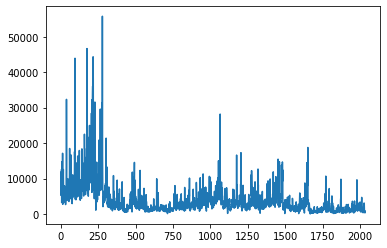

In [11]:
plt.plot(stock_data_Turnover)

In [12]:
scaler = MinMaxScaler(feature_range = (0,1))
stock_data_Turnover = scaler.fit_transform(np.array(stock_data_Turnover).reshape(-1,1))

In [13]:
stock_data_Turnover.shape

(2035, 1)

In [14]:
stock_data_Turnover

array([[0.12788156],
       [0.21219178],
       [0.09353452],
       ...,
       [0.00544294],
       [0.00570964],
       [0.01375712]])

# Now splitting the data into train and test split

In [15]:
training_size = int(len(stock_data_Turnover) * 0.75)
test_size = len(stock_data_Turnover) - training_size
train_data, test_data = stock_data_Turnover[0:training_size,:], stock_data_Turnover[training_size:len(stock_data_Turnover),:1]

In [16]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Reshape the input to be [samples, time steps, features] which is the requirement of LSTM

In [18]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Now creating the LSTM Model and checking the summary

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 23s 556ms/step - loss: 0.0068 - val_loss: 0.0022
Epoch 2/100
23/23 [==============================] - 11s 474ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 3/100
23/23 [==============================] - 11s 481ms/step - loss: 0.0045 - val_loss: 0.0011
Epoch 4/100
23/23 [==============================] - 11s 481ms/step - loss: 0.0046 - val_loss: 0.0016
Epoch 5/100
23/23 [==============================] - 11s 483ms/step - loss: 0.0046 - val_loss: 0.0010
Epoch 6/100
23/23 [==============================] - 11s 467ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 11s 466ms/step - loss: 0.0045 - val_loss: 0.0010
Epoch 8/100
23/23 [==============================] - 11s 479ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 9/100
23/23 [==============================] - 11s 469ms/step - loss: 0.0044 - val_loss: 0.0011
Epoch 10/100
23/23 [==============================] - 11s 462ms/step - loss: 0.004

23/23 [==============================] - 11s 470ms/step - loss: 0.0034 - val_loss: 7.8424e-04
Epoch 79/100
23/23 [==============================] - 11s 463ms/step - loss: 0.0034 - val_loss: 7.6947e-04
Epoch 80/100
23/23 [==============================] - 11s 462ms/step - loss: 0.0034 - val_loss: 8.6513e-04
Epoch 81/100
23/23 [==============================] - 11s 469ms/step - loss: 0.0034 - val_loss: 8.9231e-04
Epoch 82/100
23/23 [==============================] - 10s 450ms/step - loss: 0.0034 - val_loss: 8.4726e-04
Epoch 83/100
23/23 [==============================] - 11s 466ms/step - loss: 0.0035 - val_loss: 7.3929e-04
Epoch 84/100
23/23 [==============================] - 11s 471ms/step - loss: 0.0033 - val_loss: 7.7530e-04
Epoch 85/100
23/23 [==============================] - 11s 458ms/step - loss: 0.0033 - val_loss: 7.4530e-04
Epoch 86/100
23/23 [==============================] - 11s 466ms/step - loss: 0.0034 - val_loss: 7.6884e-04
Epoch 87/100
23/23 [==============================

# Now predicting and checking the  performance metrics

In [22]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# Transforming back to original form

In [23]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Now Calculate RMSE performance metrics

In [24]:
math.sqrt(mean_squared_error(y_train, train_predict))

5520.139415505422

# Testing the  Data RMSE

In [25]:
math.sqrt(mean_squared_error(y_test, test_predict))

2095.9435016903035

# Now Plotting  

# First: Shift train prediction for plotting

# Second:Shift test prediction for plotting

# Third:Plot baseline and predictions


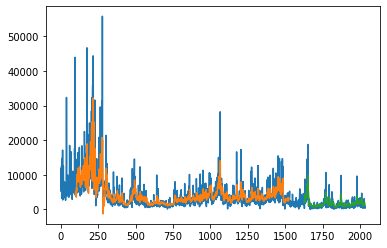

In [26]:
look_back = 100
trainPredictPlot = np.empty_like(stock_data_Turnover)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict


testPredictPlot = np.empty_like(stock_data_Turnover)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(stock_data_Turnover) - 1, :] = test_predict


plt.plot(scaler.inverse_transform(stock_data_Turnover))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# Checking the length of test data

In [27]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [28]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [29]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [30]:
lst_output=[]
n_steps=301
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.03100773 0.01530079 0.0095452  0.01300943 0.02771993 0.02462398
 0.01612548 0.00864226 0.00763308 0.03609405 0.00707922 0.00772371
 0.01824867 0.01178721 0.02969559 0.01450805 0.01799435 0.02972359
 0.0180683  0.01723912 0.02447825 0.02437397 0.02650757 0.05527779
 0.02594546 0.02073206 0.0278111  0.03533488 0.04122417 0.03124464
 0.03095461 0.0330218  0.06299181 0.1031271  0.05610086 0.04028121
 0.07187008 0.19110489 0.02458432 0.00861606 0.01125255 0.02673784
 0.0353058  0.06543123 0.05301766 0.04240296 0.02225168 0.01297641
 0.00974604 0.00997774 0.02122006 0.01424817 0.0138937  0.01116568
 0.01838381 0.01564018 0.01824149 0.02899241 0.02790084 0.06987809
 0.12824069 0.04039123 0.04062975 0.02023815 0.02103322 0.02026651
 0.01544581 0.02477869 0.0101468  0.01003338 0.02091621 0.02369215
 0.00968035 0.01247352 0.02465234 0.05497789 0.01000376 0.02005562
 0.09096515 0.00784216 0.00500215 0.01972898 0.05565343 0.03197151
 0.02511574 0.01144549 0.0060668  0.02151817 0.037

2 day output [[0.02049377]]
3 day input [0.01300943 0.02771993 0.02462398 0.01612548 0.00864226 0.00763308
 0.03609405 0.00707922 0.00772371 0.01824867 0.01178721 0.02969559
 0.01450805 0.01799435 0.02972359 0.0180683  0.01723912 0.02447825
 0.02437397 0.02650757 0.05527779 0.02594546 0.02073206 0.0278111
 0.03533488 0.04122417 0.03124464 0.03095461 0.0330218  0.06299181
 0.1031271  0.05610086 0.04028121 0.07187008 0.19110489 0.02458432
 0.00861606 0.01125255 0.02673784 0.0353058  0.06543123 0.05301766
 0.04240296 0.02225168 0.01297641 0.00974604 0.00997774 0.02122006
 0.01424817 0.0138937  0.01116568 0.01838381 0.01564018 0.01824149
 0.02899241 0.02790084 0.06987809 0.12824069 0.04039123 0.04062975
 0.02023815 0.02103322 0.02026651 0.01544581 0.02477869 0.0101468
 0.01003338 0.02091621 0.02369215 0.00968035 0.01247352 0.02465234
 0.05497789 0.01000376 0.02005562 0.09096515 0.00784216 0.00500215
 0.01972898 0.05565343 0.03197151 0.02511574 0.01144549 0.0060668
 0.02151817 0.0379317  0.

5 day output [[0.02430033]]
6 day input [0.01612548 0.00864226 0.00763308 0.03609405 0.00707922 0.00772371
 0.01824867 0.01178721 0.02969559 0.01450805 0.01799435 0.02972359
 0.0180683  0.01723912 0.02447825 0.02437397 0.02650757 0.05527779
 0.02594546 0.02073206 0.0278111  0.03533488 0.04122417 0.03124464
 0.03095461 0.0330218  0.06299181 0.1031271  0.05610086 0.04028121
 0.07187008 0.19110489 0.02458432 0.00861606 0.01125255 0.02673784
 0.0353058  0.06543123 0.05301766 0.04240296 0.02225168 0.01297641
 0.00974604 0.00997774 0.02122006 0.01424817 0.0138937  0.01116568
 0.01838381 0.01564018 0.01824149 0.02899241 0.02790084 0.06987809
 0.12824069 0.04039123 0.04062975 0.02023815 0.02103322 0.02026651
 0.01544581 0.02477869 0.0101468  0.01003338 0.02091621 0.02369215
 0.00968035 0.01247352 0.02465234 0.05497789 0.01000376 0.02005562
 0.09096515 0.00784216 0.00500215 0.01972898 0.05565343 0.03197151
 0.02511574 0.01144549 0.0060668  0.02151817 0.0379317  0.01821636
 0.00226264 0.00618256

8 day output [[0.02752629]]
9 day input [0.03609405 0.00707922 0.00772371 0.01824867 0.01178721 0.02969559
 0.01450805 0.01799435 0.02972359 0.0180683  0.01723912 0.02447825
 0.02437397 0.02650757 0.05527779 0.02594546 0.02073206 0.0278111
 0.03533488 0.04122417 0.03124464 0.03095461 0.0330218  0.06299181
 0.1031271  0.05610086 0.04028121 0.07187008 0.19110489 0.02458432
 0.00861606 0.01125255 0.02673784 0.0353058  0.06543123 0.05301766
 0.04240296 0.02225168 0.01297641 0.00974604 0.00997774 0.02122006
 0.01424817 0.0138937  0.01116568 0.01838381 0.01564018 0.01824149
 0.02899241 0.02790084 0.06987809 0.12824069 0.04039123 0.04062975
 0.02023815 0.02103322 0.02026651 0.01544581 0.02477869 0.0101468
 0.01003338 0.02091621 0.02369215 0.00968035 0.01247352 0.02465234
 0.05497789 0.01000376 0.02005562 0.09096515 0.00784216 0.00500215
 0.01972898 0.05565343 0.03197151 0.02511574 0.01144549 0.0060668
 0.02151817 0.0379317  0.01821636 0.00226264 0.00618256 0.00268459
 0.00322068 0.00294214 0.

11 day output [[0.02995992]]
12 day input [0.01824867 0.01178721 0.02969559 0.01450805 0.01799435 0.02972359
 0.0180683  0.01723912 0.02447825 0.02437397 0.02650757 0.05527779
 0.02594546 0.02073206 0.0278111  0.03533488 0.04122417 0.03124464
 0.03095461 0.0330218  0.06299181 0.1031271  0.05610086 0.04028121
 0.07187008 0.19110489 0.02458432 0.00861606 0.01125255 0.02673784
 0.0353058  0.06543123 0.05301766 0.04240296 0.02225168 0.01297641
 0.00974604 0.00997774 0.02122006 0.01424817 0.0138937  0.01116568
 0.01838381 0.01564018 0.01824149 0.02899241 0.02790084 0.06987809
 0.12824069 0.04039123 0.04062975 0.02023815 0.02103322 0.02026651
 0.01544581 0.02477869 0.0101468  0.01003338 0.02091621 0.02369215
 0.00968035 0.01247352 0.02465234 0.05497789 0.01000376 0.02005562
 0.09096515 0.00784216 0.00500215 0.01972898 0.05565343 0.03197151
 0.02511574 0.01144549 0.0060668  0.02151817 0.0379317  0.01821636
 0.00226264 0.00618256 0.00268459 0.00322068 0.00294214 0.00304803
 0.0035143  0.016987

14 day output [[0.03193465]]
15 day input [0.01450805 0.01799435 0.02972359 0.0180683  0.01723912 0.02447825
 0.02437397 0.02650757 0.05527779 0.02594546 0.02073206 0.0278111
 0.03533488 0.04122417 0.03124464 0.03095461 0.0330218  0.06299181
 0.1031271  0.05610086 0.04028121 0.07187008 0.19110489 0.02458432
 0.00861606 0.01125255 0.02673784 0.0353058  0.06543123 0.05301766
 0.04240296 0.02225168 0.01297641 0.00974604 0.00997774 0.02122006
 0.01424817 0.0138937  0.01116568 0.01838381 0.01564018 0.01824149
 0.02899241 0.02790084 0.06987809 0.12824069 0.04039123 0.04062975
 0.02023815 0.02103322 0.02026651 0.01544581 0.02477869 0.0101468
 0.01003338 0.02091621 0.02369215 0.00968035 0.01247352 0.02465234
 0.05497789 0.01000376 0.02005562 0.09096515 0.00784216 0.00500215
 0.01972898 0.05565343 0.03197151 0.02511574 0.01144549 0.0060668
 0.02151817 0.0379317  0.01821636 0.00226264 0.00618256 0.00268459
 0.00322068 0.00294214 0.00304803 0.0035143  0.0169875  0.00917566
 0.01074463 0.00493826 

17 day output [[0.03376072]]
18 day input [0.0180683  0.01723912 0.02447825 0.02437397 0.02650757 0.05527779
 0.02594546 0.02073206 0.0278111  0.03533488 0.04122417 0.03124464
 0.03095461 0.0330218  0.06299181 0.1031271  0.05610086 0.04028121
 0.07187008 0.19110489 0.02458432 0.00861606 0.01125255 0.02673784
 0.0353058  0.06543123 0.05301766 0.04240296 0.02225168 0.01297641
 0.00974604 0.00997774 0.02122006 0.01424817 0.0138937  0.01116568
 0.01838381 0.01564018 0.01824149 0.02899241 0.02790084 0.06987809
 0.12824069 0.04039123 0.04062975 0.02023815 0.02103322 0.02026651
 0.01544581 0.02477869 0.0101468  0.01003338 0.02091621 0.02369215
 0.00968035 0.01247352 0.02465234 0.05497789 0.01000376 0.02005562
 0.09096515 0.00784216 0.00500215 0.01972898 0.05565343 0.03197151
 0.02511574 0.01144549 0.0060668  0.02151817 0.0379317  0.01821636
 0.00226264 0.00618256 0.00268459 0.00322068 0.00294214 0.00304803
 0.0035143  0.0169875  0.00917566 0.01074463 0.00493826 0.00617879
 0.00855845 0.005133

20 day output [[0.03561835]]
21 day input [0.02437397 0.02650757 0.05527779 0.02594546 0.02073206 0.0278111
 0.03533488 0.04122417 0.03124464 0.03095461 0.0330218  0.06299181
 0.1031271  0.05610086 0.04028121 0.07187008 0.19110489 0.02458432
 0.00861606 0.01125255 0.02673784 0.0353058  0.06543123 0.05301766
 0.04240296 0.02225168 0.01297641 0.00974604 0.00997774 0.02122006
 0.01424817 0.0138937  0.01116568 0.01838381 0.01564018 0.01824149
 0.02899241 0.02790084 0.06987809 0.12824069 0.04039123 0.04062975
 0.02023815 0.02103322 0.02026651 0.01544581 0.02477869 0.0101468
 0.01003338 0.02091621 0.02369215 0.00968035 0.01247352 0.02465234
 0.05497789 0.01000376 0.02005562 0.09096515 0.00784216 0.00500215
 0.01972898 0.05565343 0.03197151 0.02511574 0.01144549 0.0060668
 0.02151817 0.0379317  0.01821636 0.00226264 0.00618256 0.00268459
 0.00322068 0.00294214 0.00304803 0.0035143  0.0169875  0.00917566
 0.01074463 0.00493826 0.00617879 0.00855845 0.00513388 0.01112674
 0.00604329 0.0067366  

23 day output [[0.03759048]]
24 day input [0.02594546 0.02073206 0.0278111  0.03533488 0.04122417 0.03124464
 0.03095461 0.0330218  0.06299181 0.1031271  0.05610086 0.04028121
 0.07187008 0.19110489 0.02458432 0.00861606 0.01125255 0.02673784
 0.0353058  0.06543123 0.05301766 0.04240296 0.02225168 0.01297641
 0.00974604 0.00997774 0.02122006 0.01424817 0.0138937  0.01116568
 0.01838381 0.01564018 0.01824149 0.02899241 0.02790084 0.06987809
 0.12824069 0.04039123 0.04062975 0.02023815 0.02103322 0.02026651
 0.01544581 0.02477869 0.0101468  0.01003338 0.02091621 0.02369215
 0.00968035 0.01247352 0.02465234 0.05497789 0.01000376 0.02005562
 0.09096515 0.00784216 0.00500215 0.01972898 0.05565343 0.03197151
 0.02511574 0.01144549 0.0060668  0.02151817 0.0379317  0.01821636
 0.00226264 0.00618256 0.00268459 0.00322068 0.00294214 0.00304803
 0.0035143  0.0169875  0.00917566 0.01074463 0.00493826 0.00617879
 0.00855845 0.00513388 0.01112674 0.00604329 0.0067366  0.01302971
 0.01446659 0.030371

26 day output [[0.03969184]]
27 day input [0.03533488 0.04122417 0.03124464 0.03095461 0.0330218  0.06299181
 0.1031271  0.05610086 0.04028121 0.07187008 0.19110489 0.02458432
 0.00861606 0.01125255 0.02673784 0.0353058  0.06543123 0.05301766
 0.04240296 0.02225168 0.01297641 0.00974604 0.00997774 0.02122006
 0.01424817 0.0138937  0.01116568 0.01838381 0.01564018 0.01824149
 0.02899241 0.02790084 0.06987809 0.12824069 0.04039123 0.04062975
 0.02023815 0.02103322 0.02026651 0.01544581 0.02477869 0.0101468
 0.01003338 0.02091621 0.02369215 0.00968035 0.01247352 0.02465234
 0.05497789 0.01000376 0.02005562 0.09096515 0.00784216 0.00500215
 0.01972898 0.05565343 0.03197151 0.02511574 0.01144549 0.0060668
 0.02151817 0.0379317  0.01821636 0.00226264 0.00618256 0.00268459
 0.00322068 0.00294214 0.00304803 0.0035143  0.0169875  0.00917566
 0.01074463 0.00493826 0.00617879 0.00855845 0.00513388 0.01112674
 0.00604329 0.0067366  0.01302971 0.01446659 0.03037167 0.00659445
 0.01373379 0.01926719

29 day output [[0.04189323]]
[[0.018077684566378593], [0.01924731768667698], [0.0204937681555748], [0.02177133597433567], [0.02305503562092781], [0.024300334975123405], [0.02547118254005909], [0.026547975838184357], [0.027526287361979485], [0.0284123495221138], [0.029218627139925957], [0.029959922656416893], [0.0306510329246521], [0.03130539879202843], [0.03193465247750282], [0.03254853934049606], [0.033155061304569244], [0.03376071900129318], [0.03437064588069916], [0.0349888876080513], [0.03561834990978241], [0.03626111522316933], [0.036918334662914276], [0.03759048134088516], [0.03827735781669617], [0.03897819668054581], [0.03969183564186096], [0.04041673243045807], [0.04115115851163864], [0.04189322516322136]]


In [31]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [32]:
df =stock_data_Turnover.tolist()
df.extend(lst_output)

In [33]:
len(stock_data_Turnover)

2035